In [1]:
import numpy as np
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [2]:
from tqdm import tqdm
import logging

import matplotlib.pyplot as plt
import seaborn as sns


print(sns.__version__)

0.12.2


In [3]:
### Inputing Data
user_item_rating = pd.read_parquet("../data/dicoding_user_item_rating.gzip", columns=["user_id", "course_id", "rating"])

In [4]:
min_ratings = 5
filter_items = user_item_rating['course_id'].value_counts() > min_ratings
filter_items = filter_items[filter_items].index.tolist()

min_user_ratings = 5
filter_users = user_item_rating['user_id'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

user_item_rating_new = user_item_rating[(user_item_rating['course_id'].isin(filter_items)) & (user_item_rating['user_id'].isin(filter_users))]
print('The new data frame shape:\t{} | {} users | {} items'.format(user_item_rating.shape, 
                                                                   user_item_rating.user_id.nunique(), 
                                                                   user_item_rating.course_id.nunique()))

print('The new data frame shape:\t{} | {} users | {} items'.format(user_item_rating_new.shape, 
                                                                   user_item_rating_new.user_id.nunique(), 
                                                                   user_item_rating_new.course_id.nunique()))

#del user_item_rating

The new data frame shape:	(303956, 3) | 103395 users | 63 items
The new data frame shape:	(127540, 3) | 14059 users | 63 items


In [5]:
### Transforming data input to Surprise reader
surprise_reader = Reader(rating_scale=(1, 5))
surprise_data_user_item = Dataset.load_from_df(
    user_item_rating_new[["user_id", "course_id", "rating"]],
    surprise_reader)

In [6]:
# Iterate over all algorithms
algorithms = [SVD(), SVDpp() , NMF(), NormalPredictor(), BaselineOnly()]

print("Attempting: ", str(algorithms), '\n\n\n')

# Initialize an empty dictionary to accumulate results
results_dict = {}

for i in tqdm(range(1, 11, 1)):
    len_used = user_item_rating_new.shape[0] * i * 0.1
    inused_data = user_item_rating_new.sample(int(len_used))

    # A reader is still needed but only the rating_scale param is required.
    ### Transforming data input to Surprise reader
    surprise_reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(
        inused_data[["user_id", "course_id", "rating"]],
        surprise_reader)
    
    # The columns must correspond to user id, item id, and ratings (in that order).
    

    test_rmse = {}
    test_time = {}
    fit_time = {}  # Dictionary to store results for this iteration

    for algorithm in algorithms:
        print("Starting: ", str(algorithm))
        # Perform cross validation
        results = cross_validate(algorithm, data, measures=['RMSE'], cv=10, verbose=False)

        # Store results for this algorithm in the dictionary
        algorithm_name = str(algorithm).split(' ')[0].split('.')[-1]
        test_rmse[algorithm_name] = np.mean(results['test_rmse']),
        test_time[algorithm_name] = np.mean(results['test_time']),
        fit_time[algorithm_name] = np.mean(results['fit_time'])

    # Store the iteration results in the main dictionary
    results_dict[f'Iteration_{i}'] = {
        'test_rmse':test_rmse,
        'test_time':test_time,
        'fit_time':fit_time
    }

print('\n\tDONE\n')


Attempting:  [<surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f0f00627c10>, <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7f0f00627bb0>, <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7f0f00627b80>, <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f0f00627b50>, <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7f0f00627af0>] 


  0%|          | 0/10 [00:00<?, ?it/s]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f0f00627c10>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7f0f00627bb0>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7f0f00627b80>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f0f00627b50>
Starting:  <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7f0f00627af0>
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


 10%|█         | 1/10 [00:19<02:57, 19.71s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f0f00627c10>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7f0f00627bb0>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7f0f00627b80>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f0f00627b50>
Starting:  <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7f0f00627af0>
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


 20%|██        | 2/10 [00:39<02:36, 19.52s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f0f00627c10>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7f0f00627bb0>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7f0f00627b80>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f0f00627b50>
Starting:  <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7f0f00627af0>
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


 30%|███       | 3/10 [01:05<02:37, 22.47s/it]

Estimating biases using als...
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f0f00627c10>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7f0f00627bb0>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7f0f00627b80>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f0f00627b50>
Starting:  <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7f0f00627af0>
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


 40%|████      | 4/10 [01:39<02:43, 27.33s/it]

Estimating biases using als...
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f0f00627c10>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7f0f00627bb0>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7f0f00627b80>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f0f00627b50>
Starting:  <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7f0f00627af0>
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


 50%|█████     | 5/10 [02:23<02:45, 33.19s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f0f00627c10>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7f0f00627bb0>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7f0f00627b80>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f0f00627b50>
Starting:  <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7f0f00627af0>
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


 60%|██████    | 6/10 [03:16<02:39, 39.81s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f0f00627c10>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7f0f00627bb0>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7f0f00627b80>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f0f00627b50>
Starting:  <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7f0f00627af0>
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


 70%|███████   | 7/10 [04:18<02:22, 47.34s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f0f00627c10>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7f0f00627bb0>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7f0f00627b80>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f0f00627b50>
Starting:  <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7f0f00627af0>
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


 80%|████████  | 8/10 [05:31<01:50, 55.34s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f0f00627c10>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7f0f00627bb0>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7f0f00627b80>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f0f00627b50>
Starting:  <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7f0f00627af0>
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


 90%|█████████ | 9/10 [06:53<01:03, 63.73s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f0f00627c10>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7f0f00627bb0>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7f0f00627b80>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f0f00627b50>
Starting:  <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7f0f00627af0>
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


100%|██████████| 10/10 [08:25<00:00, 50.54s/it]


	DONE


In [7]:
results_dict

{'Iteration_1': {'test_rmse': {'SVD': (0.35165837151748175,),
   'SVDpp': (0.34801766904059045,),
   'NMF': (0.7003169972799534,),
   'NormalPredictor': (0.4411053430040218,),
   'BaselineOnly': (0.35069354631453536,)},
  'test_time': {'SVD': (0.02826111316680908,),
   'SVDpp': (0.030027031898498535,),
   'NMF': (0.020625782012939454,),
   'NormalPredictor': (0.00668489933013916,),
   'BaselineOnly': (0.005168008804321289,)},
  'fit_time': {'SVD': 0.26795473098754885,
   'SVDpp': 0.32569088935852053,
   'NMF': 1.0276846408843994,
   'NormalPredictor': 0.01749093532562256,
   'BaselineOnly': 0.04437544345855713}},
 'Iteration_2': {'test_rmse': {'SVD': (0.34858547963381115,),
   'SVDpp': (0.3427329947779086,),
   'NMF': (0.7158899697119725,),
   'NormalPredictor': (0.44714776049544136,),
   'BaselineOnly': (0.34914998783132617,)},
  'test_time': {'SVD': (0.019424128532409667,),
   'SVDpp': (0.03219983577728271,),
   'NMF': (0.027495670318603515,),
   'NormalPredictor': (0.008609771728515

In [8]:
surprise_results = pd.DataFrame.from_dict({(i, j): results_dict[i][j] for i in results_dict.keys() for j in results_dict[i].keys()}, orient='index')

In [9]:
surprise_results

SVD                    SVDpp  \
Iteration_1  test_rmse   (0.35165837151748175,)   (0.34801766904059045,)   
             test_time   (0.02826111316680908,)  (0.030027031898498535,)   
             fit_time                  0.267955                 0.325691   
Iteration_2  test_rmse   (0.34858547963381115,)    (0.3427329947779086,)   
             test_time  (0.019424128532409667,)   (0.03219983577728271,)   
             fit_time                  0.344807                 0.306225   
Iteration_3  test_rmse    (0.3467540223393425,)   (0.34059241294671433,)   
             test_time  (0.026307272911071777,)  (0.050466489791870114,)   
             fit_time                  0.384136                 0.480034   
Iteration_4  test_rmse    (0.3424165733956599,)    (0.3356135188310482,)   
             test_time    (0.0254317045211792,)   (0.07271103858947754,)   
             fit_time                  0.512746                 0.703619   
Iteration_5  test_rmse   (0.33546919390009833,)    (0.3282701149937249,)   
             test_time   (0.03206105232238769,)    (0.0999664306640625,)   
             fit_time                  0.652731                 0.957073   
Iteration_6  test_rmse    (0.3290710817051396,)   (0.32295892418932803,)   
             test_time    (0.0391746997833252,)    (0.1361168384552002,)   
             fit_time                  0.798866                 1.222572   
Iteration_7  test_rmse    (0.3296484017036271,)    (0.3233151660898097,)   
             test_time   (0.05767672061920166,)   (0.16557703018188477,)   
             fit_time                  0.940029                 1.548941   
Iteration_8  test_rmse    (0.3242501484105814,)    (0.3181805772172875,)   
             test_time   (0.05191988945007324,)   (0.18122024536132814,)   
             fit_time                  1.085369                 1.849089   
Iteration_9  test_rmse    (0.3229182177978482,)   (0.31715941401239667,)   
             test_time   (0.09101574420928955,)   (0.27220370769500735,)   
             fit_time                  1.246144                 2.265696   
Iteration_10 test_rmse   (0.32056193942305733,)   (0.31494512579058914,)   
             test_time   (0.09386999607086181,)   (0.26986184120178225,)   
             fit_time                  1.343112                 2.581256   

                                            NMF          NormalPredictor  \
Iteration_1  test_rmse    (0.7003169972799534,)    (0.4411053430040218,)   
             test_time  (0.020625782012939454,)   (0.00668489933013916,)   
             fit_time                  1.027685                 0.017491   
Iteration_2  test_rmse    (0.7158899697119725,)   (0.44714776049544136,)   
             test_time  (0.027495670318603515,)  (0.008609771728515625,)   
             fit_time                   0.85581                 0.026589   
Iteration_3  test_rmse    (0.6800814665627084,)    (0.4508832916227554,)   
             test_time  (0.016957402229309082,)  (0.011695623397827148,)   
             fit_time                  1.141439                 0.042667   
Iteration_4  test_rmse     (0.642008151083689,)    (0.4543974403950785,)   
             test_time   (0.03223733901977539,)   (0.01661536693572998,)   
             fit_time                  1.439986                 0.063531   
Iteration_5  test_rmse    (0.5940605153532907,)   (0.44875163365747384,)   
             test_time  (0.027492475509643555,)  (0.031569838523864746,)   
             fit_time                  1.708292                 0.082078   
Iteration_6  test_rmse    (0.5487792331794576,)    (0.4485644375052186,)   
             test_time   (0.03385801315307617,)  (0.037694883346557614,)   
             fit_time                   1.98175                 0.101962   
Iteration_7  test_rmse    (0.5336057745895437,)    (0.4534499689829081,)   
             test_time   (0.05209195613861084,)   (0.04162192344665527,)   
             fit_time                  2.284226                 0.125244   
Iteration_8  te

In [10]:
surprise = surprise_results.reset_index().copy()
cols = [c for c in surprise.columns if c != "level_0" and c!= "level_1"]
cols

['SVD', 'SVDpp', 'NMF', 'NormalPredictor', 'BaselineOnly']

In [11]:

p,l = surprise.shape

for c in cols:
    df = surprise[c]
   
    for i in range(p):
        d = df[i]
        if isinstance(d, tuple): 
            surprise.loc[i,c] = d[0]

In [12]:
for col in cols:
    surprise[col] = surprise[col].astype("float") 

In [13]:
surprise

,level_0,level_1,SVD,SVDpp,NMF,NormalPredictor,BaselineOnly
0,Iteration_1,test_rmse,0.351658,0.348018,0.700317,0.441105,0.350694
1,Iteration_1,test_time,0.028261,0.030027,0.020626,0.006685,0.005168
2,Iteration_1,fit_time,0.267955,0.325691,1.027685,0.017491,0.044375
3,Iteration_2,test_rmse,0.348585,0.342733,0.715890,0.447148,0.349150
4,Iteration_2,test_time,0.019424,0.032200,0.027496,0.008610,0.007527
5,Iteration_2,fit_time,0.344807,0.306225,0.855810,0.026589,0.079401
6,Iteration_3,test_rmse,0.346754,0.340592,0.680081,0.450883,0.348304
7,Iteration_3,test_time,0.026307,0.050466,0.016957,0.011696,0.021483
8,Iteration_3,fit_time,0.384136,0.480034,1.141439,0.042667,0.127621
9,Iteration_4,test_rmse,0.342417,0.335614,0.642008,0.454397,0.346662


In [14]:
test_rmse = surprise[surprise['level_1']=='test_rmse']
test_time = surprise[surprise['level_1']=='test_time']
fit_time = surprise[surprise['level_1']=='fit_time']

In [15]:
test_rmse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 27
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level_0          10 non-null     object 
 1   level_1          10 non-null     object 
 2   SVD              10 non-null     float64
 3   SVDpp            10 non-null     float64
 4   NMF              10 non-null     float64
 5   NormalPredictor  10 non-null     float64
 6   BaselineOnly     10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 640.0+ bytes


Text(0.5, 1.0, 'Test RMSE')

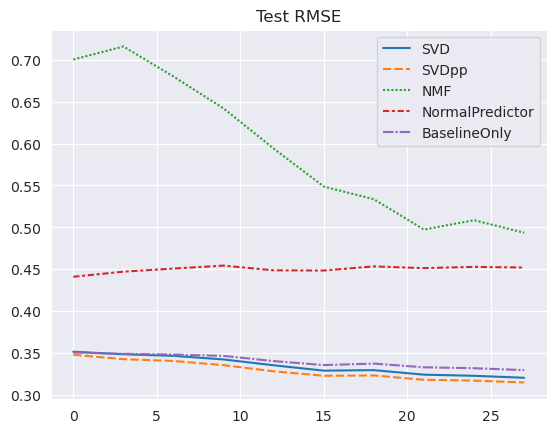

In [20]:
sns.lineplot(data=test_rmse.iloc[:,2:])
plt.title("Test RMSE")

Text(0.5, 1.0, 'Fitting Time')

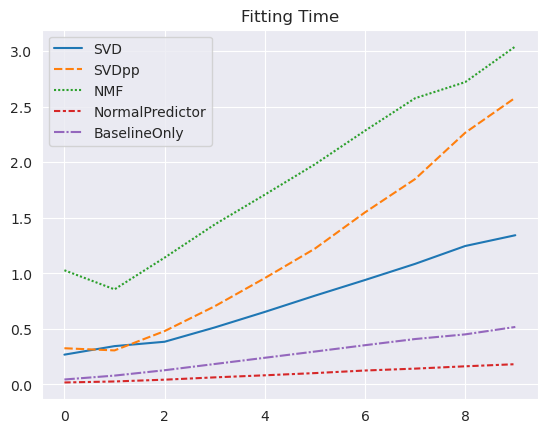

In [21]:
sns.lineplot(data=fit_time.reset_index().iloc[:,2:])
plt.title("Fitting Time")

Text(0.5, 1.0, 'Test Time')

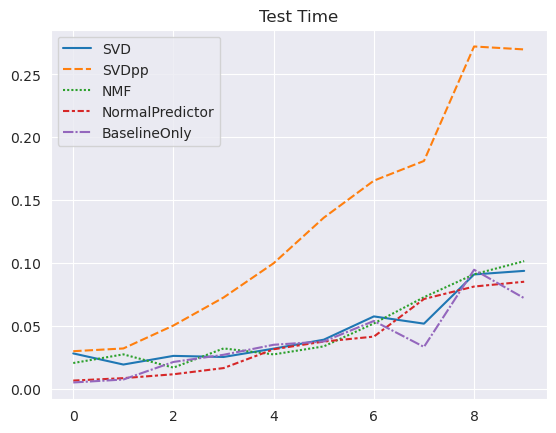

In [22]:
sns.lineplot(data=test_time.reset_index().iloc[:,2:])
plt.title("Test Time")